Exploratory Data Analysis (EDA) on Processed Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load processed dataset
file_path = "D:/MIMIC-IV-Data-Pipeline/processed_data/delirium_prediction_data_v8.csv.gz"
df = pd.read_csv(file_path, compression="gzip")

# Display basic dataset information
print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.info())  # Overview of data types and missing values
print(df.head())  # Show first few rows


✅ Loaded dataset with 546028 rows and 60 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546028 entries, 0 to 546027
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 546028 non-null  int64  
 1   hadm_id                    546028 non-null  int64  
 2   admission_type             546028 non-null  object 
 3   admission_location         546027 non-null  object 
 4   discharge_location         396210 non-null  object 
 5   insurance                  536673 non-null  object 
 6   marital_status             532409 non-null  object 
 7   race                       546028 non-null  object 
 8   ed_time_spent              379240 non-null  float64
 9   los_hosp                   546028 non-null  float64
 10  gender                     546028 non-null  object 
 11  anchor_age                 546028 non-null  int64  
 12  anchor_year                546028 no

🔍 Missing Data Summary:
icu_airway              546028
icu_iabp                545977
LabH_Hb                 545799
LabH_WBC                543740
icu_vent_mode           522485
LabH_CRP                513126
icu_map                 511535
icu_peep                508712
icu_base_excess         506541
icu_paco2               506537
icu_pao2                506534
icu_ph                  506305
icu_fio2                502293
icu_lactate             494451
icu_ras_scale           470323
icu_wbc                 463461
icu_plt                 463453
icu_hb                  463429
icu_glucose             463247
icu_hco3                463153
icu_bun                 463150
icu_creatinine          463134
icu_chloride            463120
icu_potassium           463118
icu_sodium              463111
icu_temp                461955
icu_gcs_motor           461012
icu_gcs_verbal          461003
icu_gcs_eye             460995
icu_spo2                460882
icu_resp_rate           460872
los            

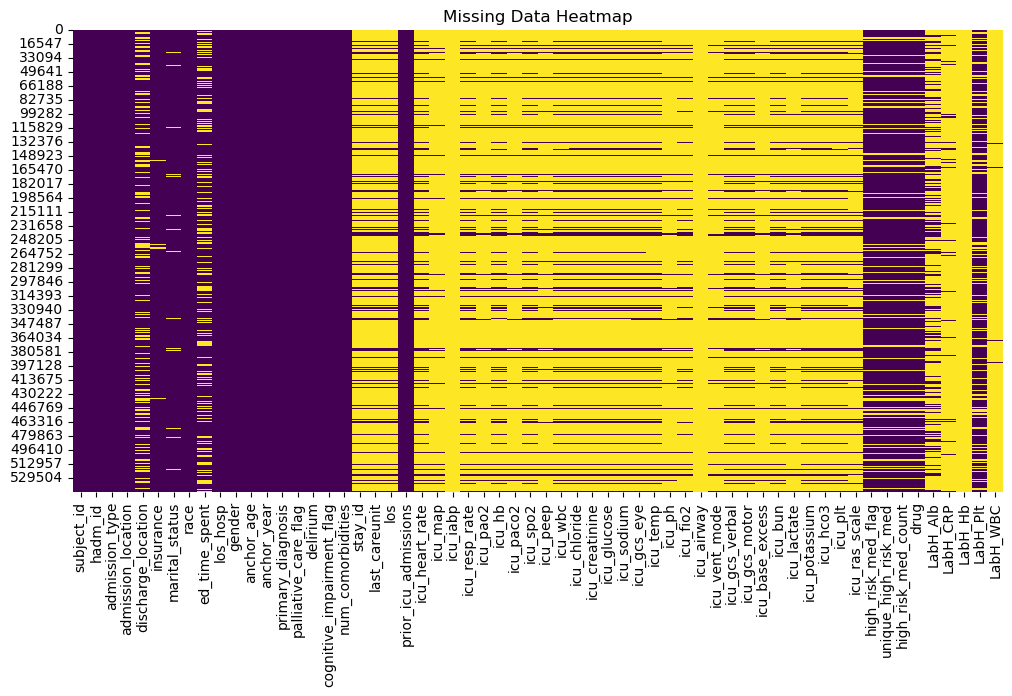

In [3]:
#Step 2: Check Missing Data
# Identify missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing data summary
print("🔍 Missing Data Summary:")
print(missing_values)

# Plot missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


In [5]:
#Step 3: Summary Statistics 
# Summary of numerical variables
print("📊 Summary Statistics for Numerical Variables:")
print(df.describe())

# Summary of categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
print("📊 Summary of Categorical Variables:")
for col in categorical_cols:
    print(f"\n🔍 {col}:\n", df[col].value_counts(dropna=False))


📊 Summary Statistics for Numerical Variables:
         subject_id       hadm_id  ed_time_spent       los_hosp  \
count  5.460280e+05  5.460280e+05  379240.000000  546028.000000   
mean   1.501118e+07  2.500100e+07     652.782858       4.761742   
std    2.877694e+06  2.888710e+06     605.340445       7.207125   
min    1.000003e+07  2.000002e+07   -1124.000000      -0.945139   
25%    1.252380e+07  2.249662e+07     314.000000       1.128472   
50%    1.501961e+07  2.500385e+07     467.000000       2.818056   
75%    1.750403e+07  2.750282e+07     772.000000       5.621528   
max    1.999999e+07  2.999994e+07   18359.000000     515.562500   

          anchor_age    anchor_year  palliative_care_flag       delirium  \
count  546028.000000  546028.000000         546028.000000  546028.000000   
mean       56.890777    2152.366357              0.023592       0.017928   
std        18.969772      23.616508              0.151775       0.132689   
min        18.000000    2110.000000           

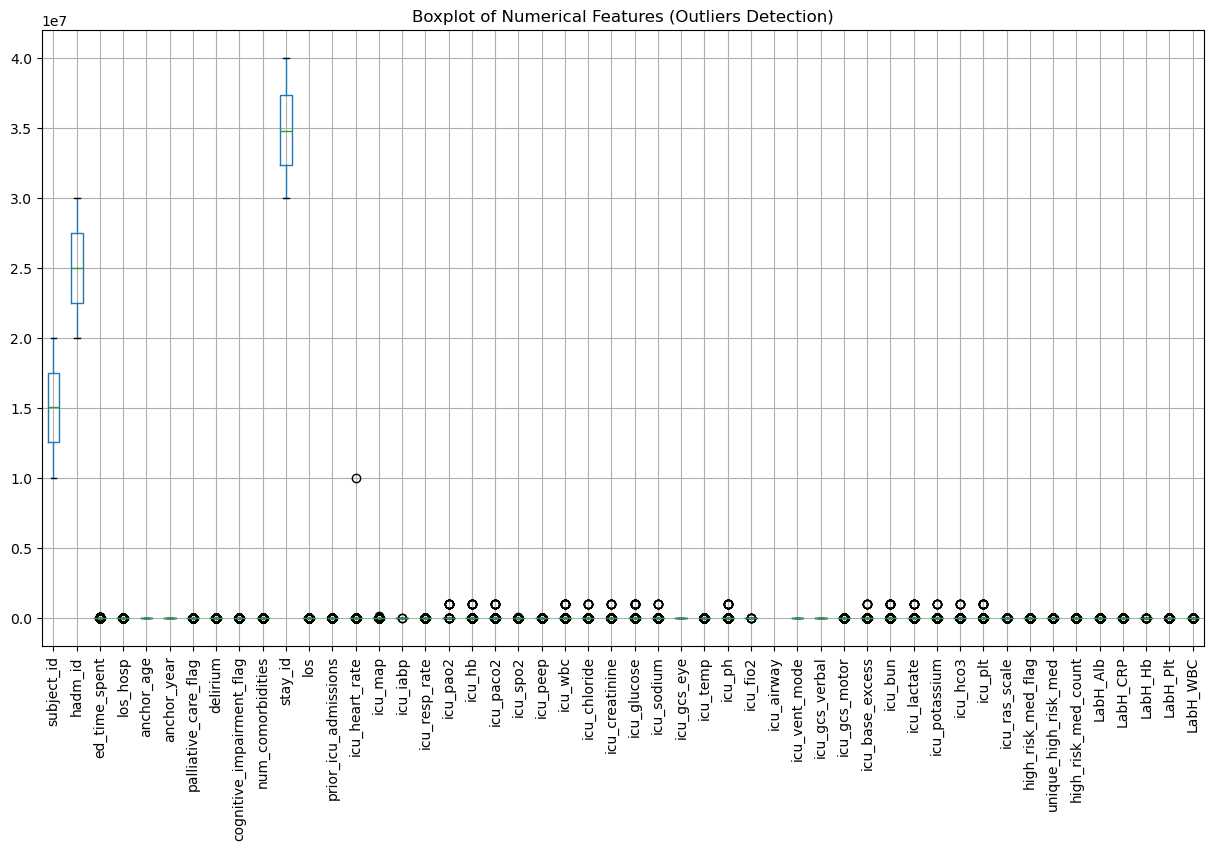

In [8]:
#  Step 4: Outliers & Data Distributions
# Identify potential outliers using boxplots
numerical_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()


C:\Users\truly\AppData\Local\Temp\ipykernel_2316\994766335.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="delirium", data=df, palette="coolwarm")


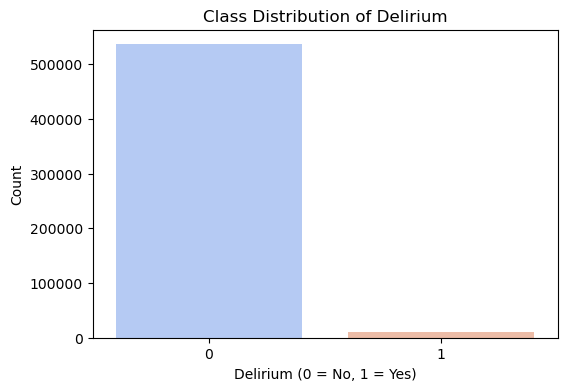

🔍 Delirium Class Distribution:
 delirium
0    98.207235
1     1.792765
Name: proportion, dtype: float64


In [10]:
#Step 5: Class Imbalance Check (delirium)
# If `delirium` column exists, check class balance
if "delirium" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="delirium", data=df, palette="coolwarm")
    plt.title("Class Distribution of Delirium")
    plt.xlabel("Delirium (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()
    
    print("🔍 Delirium Class Distribution:\n", df["delirium"].value_counts(normalize=True) * 100)


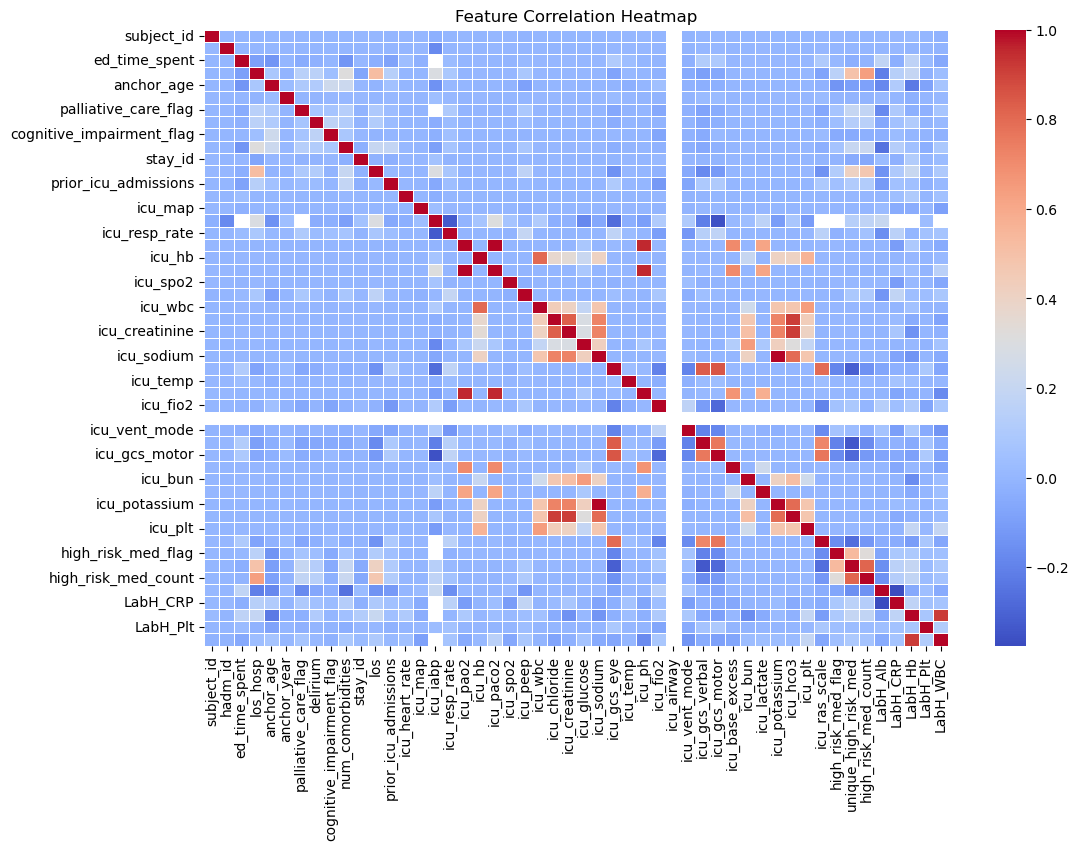

In [14]:
#Step 6: Feature Correlations & Relationships 
# Compute correlation matrix for numerical variables
 
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (exclude categorical)
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



In [18]:
# Step 7: Save EDA Summary
# Save summary statistics and missing data report
eda_output_path = "D:/MIMIC-IV-Data-Pipeline/eda_reports"
os.makedirs(eda_output_path, exist_ok=True)

# Save missing data summary
missing_values.to_csv(os.path.join(eda_output_path, "processed_Data_missing_data_summary.csv"))

# Save summary statistics
df.describe().to_csv(os.path.join(eda_output_path, "processed_Data_numerical_summary.csv"))

print(f"📊 EDA Summary Reports saved in: {eda_output_path}")


📊 EDA Summary Reports saved in: D:/MIMIC-IV-Data-Pipeline/eda_reports
